In [1]:
# Project 2: Summer Research 2022 ***

# Goal: To study of collective behaviour and flavor transformation of neutrinos in Supernovae 
# Paper: PHYSICAL REVIEW D 75, 125005 (2007)

# Advisor: Prof. Huyaiyu(Mike) Duan, Department of Physics & Astronomy, UNM
# Student: Tousif Reza, Grad, Department of Physics & Astronomy, UNM

Assumptions: Monoenergetic neutrino gas with different but constant number densities initially, homogeneous and isotropic with no matter background. 

The equations of motion (e.o.m.) for the NFIS’s $s_1$ (neutrino) and $s_2$ (antineutrino) of this simple assymetric bipolar system are follows:



$\boxed{\frac{ds_1}{dt}=s_1\times(\mu_{V,1}H_V+\mu_\nu n_{\nu,2}s_2)}$ -------->>(1)

$\boxed{\frac{ds_2}{dt}=s_2\times(\mu_{V,2}H_V+\mu_\nu n_{\nu,1}s_1)}$ -------->>(2)


With $n_{\nu,1}=n_\nu$ and $n_{\nu,2}=\alpha n_\nu$ , where $\alpha$ is assymetric parameter ($\alpha\neq 1$, a positive constant).


$n_\nu$ has a linear dependence on time, $\boxed{n_\nu(t)=n_\nu(0)(1-\gamma^{-1}\mu_Vt)}$ -------->>(3)

$\gamma$: Adiabatic parameter


 $H_V\equiv -\hat e_x^f\sin2\theta_v+\hat e_z^f\cos2\theta_v $  and   $\mu_{V,1}=-\mu_{V,2}\equiv \frac{\delta m^2}{2E_\nu}$ ; and $\mu_\nu\equiv -2\sqrt{2}G_F$, $G_F$ Fermi coupling constant.
 
 
 Initial conditions: $s_1(0)=-s_2(0)=\frac{\hat e_z^f}{2}$  ----------->>(4)
 
 
 Rewriting equation (3) as,
 
 $\frac{n_\nu(t)}{n_\nu^x}=\frac{n_\nu(0)}{n_\nu^x}(1-\gamma^{-1}\mu_Vt)$
 
 In this analysis we will use $\frac{n_\nu(0)}{n_\nu^x}$=2 we get,
 
 $\boxed{\frac{n_\nu(t)}{n_\nu^x}=2(1-\gamma^{-1}\mu_Vt)}$   --------->>(5)
 


We can write eqn (1) and (2) as,


$\boxed{\frac{ds_1}{dt}=s_1\times(\mu_V H_V+\mu_\nu \alpha\frac{n_{\nu}}{n_\nu^x} n_\nu^x s_2)}$ -------->>(A)

$\boxed{\frac{ds_2}{dt}=s_2\times(-\mu_V H_V+\mu_\nu \frac{n_{\nu}}{n_\nu^x}n_\nu^x s_1)}$ -------->>(B)

$n_\nu$ is a function of time we can put $\frac{n_\nu}{n_\nu^x}$ from (5) and we have $\boxed{ n_\nu^x=8\frac{1+\alpha}{(1-\alpha)^2}n_\nu^0}$  ------>>(C)

and $n_\nu^0\equiv \frac{\mu_V}{|\mu_\nu|}=\frac{\delta m^2}{4\sqrt2G_F E_\nu}$

We will solve (A) and (B) component wise for vector $s_1$ and $s_2$ .then we will take dot product with $H_V$ to find out angle between $s_1$, $s_2$ and $H_V$ 

Notes: $H_V\equiv\hat e_z^v=(0,0,1)$ 

We can set, $\cos 2\theta=1$ and $\sin 2\theta=0$

$s_1\times{H_V}= \left[ {\begin{array}{cc} i & j & k \\ s_{1x}& s_{1y} & s_{1z}\\-\sin 2\theta&0& \cos2\theta \end{array} } \right]=i(s_{1y}\cos2\theta)-j(s_{1x}\cos2\theta+s_{1z}sin2\theta)+k(s_{1y}\sin2\theta)$

$s_2\times{H_V}= \left[ {\begin{array}{cc} i & j & k \\ s_{2x}& s_{2y} & s_{2z}\\-\sin 2\theta&0& \cos2\theta \end{array} } \right]=i(s_{2y}\cos2\theta)-j(s_{2x}\cos2\theta+s_{2z}sin2\theta)+k(s_{2y}\sin2\theta)$

$s_1\times{s_2}= \left[ {\begin{array}{cc} i & j & k \\ s_{1x}& s_{1y} & s_{1z}\\s_{2x}&s_{2y}&s_{2z} \end{array} } \right]=i(s_{1y}s_{2z}-s_{2y}s_{1z})-j(s_{1x}s_{2z}-s_{2x}s_{1z})+k(s_{1x}s_{2y}-s_{2x}s_{1y})$

In [2]:
#Numerical solution for NFIS's equation of motion

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp 
import scipy.optimize as opt
import matplotlib.pyplot as plt

We can get three equations from (A):

\begin{align}
        \dot{s}_{1x} &=s_{1y}\left(\mu_{V}+\alpha\mu_{\nu}n_{\nu}\,s_{2z}\right)-\alpha\mu_{\nu}n_{\nu}\,s_{2y}\,s_{1z} \\[5pt]
        \dot{s}_{1y} &=-s_{1x}\left(\mu_{V}+\alpha\mu_{\nu}n_{\nu}\,s_{2z}\right)+\alpha\mu_{\nu}n_{\nu}\,s_{2x}\,s_{1z} \\[5pt]
        \dot{s}_{1z} &=\alpha\mu_{\nu}n_{\nu}\,s_{1x}\,s_{2y}-\alpha\mu_{\nu}n_{\nu}\,s_{1y}\,s_{2x}
    \end{align}
    
and three equations from (B):

\begin{align}
        \dot{s}_{2x} &=s_{2y}\left(-\mu_{V}+\mu_{\nu}n_{\nu}\,s_{1z}\right)-\mu_{\nu}n_{\nu}\,s_{2z}\,s_{1y} \\[5pt]
        \dot{s}_{2y} &=-s_{2x}\left(-\mu_{V}+\mu_{\nu}n_{\nu}\,s_{1z}\right)+\mu_{\nu}n_{\nu}\,s_{2z}\,s_{1x} \\[5pt]
        \dot{s}_{2z} &=\mu_{\nu}n_{\nu}\,s_{2x}\,s_{1y}-\mu_{\nu}n_{\nu}\,s_{2y}\,s_{1x}.
    \end{align}
    
These are six coupled differential equation needs to solve.    


We have (5), we need to have time information!
 
$\boxed{\frac{n_\nu(t)}{n_\nu^x}=2(1-\gamma^{-1}\mu_V t)}$   
 
$(1-\gamma^{-1}\mu_Vt)=\frac{n_\nu(t)}{2 n_\nu^x}$ 

$\gamma^{-1}\mu_Vt=1-\frac{n_\nu(t)}{2 n_\nu^x}$ 

$t=\frac{\gamma}{\mu_V}(1-\frac{n_\nu(t)}{2 n_\nu^x})$

let, $R=\frac{n_\nu(t)}{ n_\nu^x}$ then $t=\frac{\gamma}{\mu_V}(1-\frac{n_1}{2})$
 

In [4059]:
#Calculating t

mu_V=1 

gamma_1=40

def t(n):
    
    return(gamma_1/mu_V)*(1-(n/2))

n=np.linspace(2,0)

In [4060]:
t(n)  #t is varying from 20 to 40 for gamma=40 , t has inverse of mu_V dimension
    



array([ 0.        ,  0.81632653,  1.63265306,  2.44897959,  3.26530612,
        4.08163265,  4.89795918,  5.71428571,  6.53061224,  7.34693878,
        8.16326531,  8.97959184,  9.79591837, 10.6122449 , 11.42857143,
       12.24489796, 13.06122449, 13.87755102, 14.69387755, 15.51020408,
       16.32653061, 17.14285714, 17.95918367, 18.7755102 , 19.59183673,
       20.40816327, 21.2244898 , 22.04081633, 22.85714286, 23.67346939,
       24.48979592, 25.30612245, 26.12244898, 26.93877551, 27.75510204,
       28.57142857, 29.3877551 , 30.20408163, 31.02040816, 31.83673469,
       32.65306122, 33.46938776, 34.28571429, 35.10204082, 35.91836735,
       36.73469388, 37.55102041, 38.36734694, 39.18367347, 40.        ])

For convinience, we will choose $\mu_{V} = -\mu_{\nu}n_{\nu}^0 = 1 $. These quantities have dimensions of energy. We have;


\begin{align}
        \dot{s}_{1x} &=s_{1y}\left(\mu_{V}+\alpha\mu_{\nu}n_{\nu}\,s_{2z}\right)-\alpha\mu_{\nu}n_{\nu}\,s_{2y}\,s_{1z} \nonumber \\[5pt]
        &=s_{1y}\left(1-\alpha\left(\frac{n_{\nu}}{n_{\nu}^{0}}\right)s_{2z}\right)+\alpha\left(\frac{n_{\nu}}{n_{\nu}^{0}}\right)s_{2y}\,s_{1z} \nonumber \\[5pt]
        &=s_{1y}\left(1-\frac{8\alpha(1+\alpha)}{(1-\alpha)^{2}}\left(\frac{n_{\nu}}{n_{\nu}^{x}}\right)s_{2z}\right)+\frac{8\alpha(1+\alpha)}{(1-\alpha)^{2}}\left(\frac{n_{\nu}}{n_{\nu}^{x}}\right)s_{2y}\,s_{1z} \nonumber \\[5pt]
        &=s_{1y}\left(1-factor \left(\frac{n_{\nu}}{n_{\nu}^{x}}\right)s_{2z}\right)+\frac{8\alpha(1+\alpha)}{(1-\alpha)^{2}}\left(\frac{n_{\nu}}{n_{\nu}^{x}}\right)s_{2y}\,s_{1z} \nonumber \\[5pt]. 
    \end{align}
    
Similarly we have other equations,

\begin{align}
         \dot{s}_{1y} &=-s_{1x}\left(1-factor\,(\frac{n_\nu}{n_\nu^x})s_{2z}\right)- factor(\frac{n_\nu}{n_\nu^x})\,s_{2x}s_{1z} \\[5pt]
         \dot{s}_{1z} &=-factor \,(\frac{n_\nu}{n_\nu^x})\,s_{1x}s_{2y}+factor\,(\frac{n_\nu}{n_\nu^x})\,s_{1y}s_{2x} \\[5pt]
         \dot{s}_{2x} &=s_{2y}\left(-1-\frac{factor}{\alpha}\,(\frac{n_\nu}{n_\nu^x})\,s_{1z}\right)+\frac{factor}{\alpha}\,(\frac{n_\nu}{n_\nu^x})\,s_{2z}\,s_{1y} \\[5pt]
         \dot{s}_{2y} &=-s_{2x}\left(-1-\frac{factor}{\alpha}\,(\frac{n_\nu}{n_\nu^x})s_{1z}\right)-\frac{factor}{\alpha}(\frac{n_\nu}{n_\nu^x})s_{2z}\,s_{1x} \\[5pt]
         \dot{s}_{2z} &=-\frac{factor}{\alpha}\,(\frac{n_\nu}{n_\nu^x})\,s_{2x}\,s_{1y}+\frac{factor}{\alpha}\,(\frac{n_\nu}{n_\nu^x})\,s_{2y}\,s_{1x}.
     \end{align}



In [4061]:
#Its better to defined factor as factor_1 and 2 as our alpha's are different

alpha_1 = 0.8 # asymmetry parameter
alpha_2 = 0.2 # asymmetry parameter

factor_1 = (8*alpha_1*(1 + alpha_1))/(1 - alpha_1)**2  #alpha*(n_v^x/n_v^0) Defined in eqn (C)
factor_2 = (8*alpha_2*(1 + alpha_2))/(1 - alpha_2)**2 

mu_V = 1 # gyro-magnetic ratio , unit: energy 
mu_nu_not = 1 # Taken to be unity for convenience
theta_v_tilde = 0.01 # vacuum mixing angle  whose value lies between (0, pi/4) in inverted mass hierarchy


In [4062]:
# Differential equations we want to solve for s_1 and s_2

def dydt(t, y):           # t is the time, and y contains the NFIS's
    
    R_1= 2*(1 - t/gamma_1) # defined above in equation (5), mu_V=1 is taken , n_v/n_v^x
    
    s_1x = y[0] 
    s_1y = y[1]
    s_1z = y[2]
    s_2x = y[3]
    s_2y = y[4]
    s_2z = y[5]
    
    # Six coupled differential equations three for s_1 and others three for s_2
    # Solving component wise simultaneouly
    
    ds_1xdt = s_1y * (1 - factor_1 * R_1* s_2z) +factor_1 * R_1* s_2y * s_1z
    ds_1ydt = -s_1x * (1 - factor_1 * R_1* s_2z) -factor_1 * R_1* s_2x * s_1z 
    ds_1zdt = -factor_1 * R_1* (s_1x * s_2y - s_1y * s_2x)
    ds_2xdt = s_2y * (-1 - (factor_1/alpha_1) * R_1* s_1z) + (factor_1/alpha_1) * R_1* s_2z * s_1y
    ds_2ydt = -s_2x * (-1 - (factor_1/alpha_1) * R_1* s_1z) - (factor_1/alpha_1) * R_1* s_2z * s_1x
    ds_2zdt = (-factor_1/alpha_1) * R_1* (s_2x * s_1y - s_2y * s_1x)
    
    return [ds_1xdt, ds_1ydt, ds_1zdt, ds_2xdt, ds_2ydt, ds_2zdt]  #returning the arrays of s_1 and s_2
    

It is more convenient to work on vacuum mass basis. So, we can swit from flavor basis to vacuum mass basis easily, 

We have following equations:

$\hat e_x^v=\hat e_x^f\cos 2\theta_v+\hat e_z^f\sin2\theta_v $ 

$\hat e_z^v=H_V\equiv -\hat e_x^f\sin 2\theta_v+\hat e_z^f\cos2\theta_v$ 

Initial conditions for $s_1$ and $s_2$ in Vacuum mass basis are,
 \begin{align}
         \mathbf{s}_{1}(0)&=\frac{1}{2}\hat e_z^f=\frac{1}{2}\left(\begin{array}{c}
\mathrm{sin}2\theta_{v}\\
0\\
\mathrm{cos}2\theta_{v}
\end{array}\right) \\[5pt]
\& \\[5pt]
\mathbf{s}_{2}(0) &=-\frac{1}{2}\hat e_z^f=-\frac{1}{2}\left(\begin{array}{c}
\mathrm{sin}2\theta_{v}\\
0\\
\mathrm{cos}2\theta_{v}
\end{array}\right).
     \end{align}

In [4063]:
#initial condition for s_1 and s_2:

#for s_1_0=e_z^f/2 --> (s_1x,s_1y,s_1z)  , s_1x_0=s/2,  s_1y_0=0, s_1z_0=c/2
#for s_2_0=-e_z^f/2 --> (s_2x,s_2y,s_2z) , s_2x_0=-s/2, s_2y_0=0, s_2z_0=-c/2

theta=(np.pi/2)-0.01   #theta_tilde=pi/2-theta_v, where theta is Vacuum Mixing angle

s=np.sin(2*theta)      #theta=theta_v
c=np.cos(2*theta)

#y0=[s_1_0,s_2_0]

y0=[s/2,0,c/2,-s/2,0,-c/2]


In [4064]:
# solving the differential equations

t = np.linspace(0, 40, 101) # times for which we are looking for the solution

sol_1 = solve_ivp(dydt, t_span=(0, 40), y0=y0, t_eval = t, rtol=1e-6, atol=1e-6) # integrating the ODEs over time



Since we know $s_1$ and $s_2$ from sol, we can take dot product with $H_V$ to find out the angle between $s_1$, $s_2$ and $H_V$ ; $H_V\equiv\hat e_z^v=(0,0,1)$ 

\begin{align}
        \mathrm{cos}\upsilon_{1} &=\frac{\mathbf{s}_{1}\cdot\mathbf{e}_{z}^{\mathrm{v}}}{\left\Vert \mathbf{s}_{1}\right\Vert }\nonumber \\[5pt]
        &=\frac{s_{1z}}{\sqrt{s_{1x}^{2}+s_{1y}^{2}+s_{1z}^{2}}} \\[5pt]
        & \& \nonumber \\[5pt]
        \mathrm{cos}\upsilon_{2} &=\frac{\mathbf{s}_{2}\cdot\mathbf{e}_{z}^{\mathrm{v}}}{\left\Vert \mathbf{s}_{2}\right\Vert } \nonumber \\[5pt]
        &=\frac{s_{2z}}{\sqrt{s_{2x}^{2}+s_{2y}^{2}+s_{2z}^{2}}}
    \end{align}

In [4065]:
#cos_v_1=c_1
#cos_v_2=c_2

c_1a = sol_1.y[2]/np.sqrt(sol_1.y[0]**2 + sol_1.y[1]**2 + sol_1.y[2]**2) # cos(theta_1)
c_2a = sol_1.y[5]/np.sqrt(sol_1.y[3]**2 + sol_1.y[4]**2 + sol_1.y[5]**2) # cos(theta_2)


In [4066]:
#s_1_norm = np.sqrt(sol_1.y[0]**2 + sol_1.y[1]**2 + sol_1.y[2]**2)
#s_2_norm = np.sqrt(sol_1.y[3]**2 + sol_1.y[4]**2 + sol_1.y[5]**2)


In [4067]:
# plotting 
R_1= 2*(1 - t/gamma_1)
#plt.plot(R_1, c_1a,"r", label = r'$\mathrm{cos} \upsilon_{1}$')
#plt.plot(R_1, c_2a,"g" ,label = r'$\mathrm{cos} \upsilon_{2}$')
#plt.xlim(1.25, 0.0)
#plt.legend()
#plt.xlabel(r'$n_{\nu}/n_{\nu}^{x}$')
#plt.ylabel(r'$\mathrm{cos}\upsilon_{1,2}$')
#plt.title("Fig a")


In [4068]:
#We will do the same analysis for theta_tilde=0.01, gamma=40 and alpha=0.2


def dydt(t, y):           # t is the time, and y contains the NFIS's
    
    R_1= 2*(1 - t/gamma_1) # defined above in equation (5), mu_V=1 is taken , n_v/n_v^x
    
    s_1x = y[0] 
    s_1y = y[1]
    s_1z = y[2]
    s_2x = y[3]
    s_2y = y[4]
    s_2z = y[5]
    
    # Six coupled differential equations three for s_1 and others three for s_2
    # Solving component wise simultaneouly
    
    ds_1xdt = s_1y * (1 - factor_2 * R_1* s_2z) +factor_2 * R_1* s_2y * s_1z
    ds_1ydt = -s_1x * (1 - factor_2 * R_1* s_2z) -factor_2 * R_1* s_2x * s_1z 
    ds_1zdt = -factor_2 * R_1* (s_1x * s_2y - s_1y * s_2x)
    ds_2xdt = s_2y * (-1 - (factor_2/alpha_2) * R_1* s_1z) + (factor_2/alpha_2) * R_1* s_2z * s_1y
    ds_2ydt = -s_2x * (-1 - (factor_2/alpha_2) * R_1* s_1z) - (factor_2/alpha_2) * R_1* s_2z * s_1x
    ds_2zdt = (-factor_2/alpha_2) * R_1* (s_2x * s_1y - s_2y * s_1x)
    
    return [ds_1xdt, ds_1ydt, ds_1zdt, ds_2xdt, ds_2ydt, ds_2zdt]  #returning the arrays of s_1 and s_2
    
# solving the differential equations

t = np.linspace(0, 40, 101) # times for which we are looking for the solution

sol_2 = solve_ivp(dydt, t_span=(0, 40), y0=y0, t_eval = t, rtol=1e-6, atol=1e-6) # integrating the ODEs over time


In [4069]:
c_1b = sol_2.y[2]/np.sqrt(sol_2.y[0]**2 + sol_2.y[1]**2 + sol_2.y[2]**2) # cos(theta_1)
c_2b = sol_2.y[5]/np.sqrt(sol_2.y[3]**2 + sol_2.y[4]**2 + sol_2.y[5]**2) # cos(theta_2)


In [4070]:
# plotting 

#plt.plot(R_1, c_1b,"r", label = r'$\mathrm{cos} \upsilon_{1}$')
#plt.plot(R_1, c_2b,"g" ,label = r'$\mathrm{cos} \upsilon_{2}$')
#plt.xlim(1.25, 0)
#plt.legend()
#plt.xlabel(r'$n_{\nu}/n_{\nu}^{x}$')
#plt.ylabel(r'$\mathrm{cos}\upsilon_{1,2}$')
#plt.title("Fig b")


In [4071]:
#We will do the same analysis for differnt theta but same alpha=0.8 and gamma=40, 

#theta=0.6
#alpha_1=0.8
#gamma_1=40

def dydt(t, y):           # t is the time, and y contains the NFIS's
    
    R_1= 2*(1 -t/gamma_1) # defined above in equation (5), mu_V=1 is taken , n_v/n_v^x
    
    s_1x = y[0] 
    s_1y = y[1]
    s_1z = y[2]
    s_2x = y[3]
    s_2y = y[4]
    s_2z = y[5]
    
    # Six coupled differential equations three for s_1 and other three for s_2
    # Solving component wise simultaneouly
    
    ds_1xdt = s_1y * (1 - factor_1 * R_1* s_2z) + factor_1 * R_1* s_2y * s_1z
    ds_1ydt = -s_1x * (1 - factor_1 * R_1* s_2z)-factor_1 * R_1* s_2x * s_1z 
    ds_1zdt = -factor_1 * R_1* (s_1x * s_2y - s_1y * s_2x)
    ds_2xdt = s_2y * (-1 - (factor_1/alpha_1) * R_1* s_1z) + (factor_1/alpha_1) * R_1* s_2z * s_1y
    ds_2ydt = -s_2x * (-1 - (factor_1/alpha_1) * R_1* s_1z) - (factor_1/alpha_1) * R_1* s_2z * s_1x
    ds_2zdt = (-factor_1/alpha_1) * R_1* (s_2x * s_1y - s_2y * s_1x)
    
    return [ds_1xdt, ds_1ydt, ds_1zdt, ds_2xdt, ds_2ydt, ds_2zdt]  #returning the arrays of s_1 and s_2
    
theta_1=0.6
s1=np.sin(2*theta_1)
c1=np.cos(2*theta_1)

y0=[s1/2,0,c1/2,-s1/2,0,-c1/2]

# solving the differential equations

t = np.linspace(0, 40, 101) # times for which we are looking for the solution

sol_3= solve_ivp(dydt, t_span=(0, 40), y0=y0, t_eval = t, rtol=1e-6, atol=1e-6) # integrating the ODEs over time


In [4072]:
c_1c = sol_3.y[2]/np.sqrt(sol_3.y[0]**2 + sol_3.y[1]**2 + sol_3.y[2]**2) # cos(theta_1)
c_2c = sol_3.y[5]/np.sqrt(sol_3.y[3]**2 + sol_3.y[4]**2 + sol_3.y[5]**2) # cos(theta_2)


In [4073]:
# plotting 

#plt.plot(R_1, c_1c,"r", label = r'$\mathrm{cos} \upsilon_{1}$')
#plt.plot(R_1, c_2c,"g" ,label = r'$\mathrm{cos} \upsilon_{2}$')
#plt.xlim(1.1, 0)
#plt.legend()
#plt.xlabel(r'$n_{\nu}/n_{\nu}^{x}$')
#plt.ylabel(r'$\mathrm{cos}\upsilon_{1,2}$')
#plt.title("Fig c")


In [4074]:
#solving for theta_tilde=0.01 and gamma=200 alpha=0.2

In [4075]:
#time information for gamma=200

alpha_2=0.2

mu_V=1 

gamma_2=200

def t_1(n):
    
    return(gamma_2/mu_V)*(1-(n/2))

n=np.linspace(2,0)

In [4076]:
t_1(n) #t is varying from 100 to 200 for gamma=200 , t has inverse of mu_V dimension

array([  0.        ,   4.08163265,   8.16326531,  12.24489796,
        16.32653061,  20.40816327,  24.48979592,  28.57142857,
        32.65306122,  36.73469388,  40.81632653,  44.89795918,
        48.97959184,  53.06122449,  57.14285714,  61.2244898 ,
        65.30612245,  69.3877551 ,  73.46938776,  77.55102041,
        81.63265306,  85.71428571,  89.79591837,  93.87755102,
        97.95918367, 102.04081633, 106.12244898, 110.20408163,
       114.28571429, 118.36734694, 122.44897959, 126.53061224,
       130.6122449 , 134.69387755, 138.7755102 , 142.85714286,
       146.93877551, 151.02040816, 155.10204082, 159.18367347,
       163.26530612, 167.34693878, 171.42857143, 175.51020408,
       179.59183673, 183.67346939, 187.75510204, 191.83673469,
       195.91836735, 200.        ])

In [4077]:
# Differential equations we want to solve for s_1 and s_2

def dydt(t, y):  # t is the time, and y contains the NFIS's
    
    R_2= 2*(1 -t/gamma_2) # defined above in equation (5), mu_V=1 is taken , n_v/n_v^x
    
    s_1x = y[0] 
    s_1y = y[1]
    s_1z = y[2]
    s_2x = y[3]
    s_2y = y[4]
    s_2z = y[5]
    
    # Six coupled differential equations three for s_1 and others three for s_2
    # Solving component wise simultaneouly
    
    ds_1xdt = s_1y * (1 - factor_2 * R_2* s_2z) +factor_2 * R_2* s_2y * s_1z
    ds_1ydt = -s_1x * (1 - factor_2 * R_2* s_2z) -factor_2 * R_2* s_2x * s_1z 
    ds_1zdt = -factor_2 * R_2* (s_1x * s_2y - s_1y * s_2x)
    ds_2xdt = s_2y * (-1 - (factor_2/alpha_2) * R_2* s_1z) + (factor_2/alpha_2) * R_2* s_2z * s_1y
    ds_2ydt = -s_2x * (-1 - (factor_2/alpha_2) * R_2* s_1z) - (factor_2/alpha_2) * R_2* s_2z * s_1x
    ds_2zdt = (-factor_2/alpha_2) * R_2* (s_2x * s_1y - s_2y * s_1x)
    
    return [ds_1xdt, ds_1ydt, ds_1zdt, ds_2xdt, ds_2ydt, ds_2zdt]  #returning the arrays of s_1 and s_2


theta=(np.pi/2)-0.01   #theta_tilde=pi/2-theta_v, where theta is Vacuum Mixing angle

s=np.sin(2*theta)      #theta=theta_v
c=np.cos(2*theta)

#y0=[s_1_0,s_2_0]

y0=[s/2,0,c/2,-s/2,0,-c/2]

# solving the differential equations

t = np.linspace(0, 200, 101) # times for which we are looking for the solution

sol_4 = solve_ivp(dydt, t_span=(0, 200), y0=y0, t_eval = t, rtol=1e-6, atol=1e-6) # integrating the ODEs over time

    

In [4078]:
c_1d = sol_4.y[2]/np.sqrt(sol_4.y[0]**2 + sol_4.y[1]**2 + sol_4.y[2]**2) # cos(theta_1)
c_2d = sol_4.y[5]/np.sqrt(sol_4.y[3]**2 + sol_4.y[4]**2 + sol_4.y[5]**2) # cos(theta_2)


In [4079]:
# plotting 
R_2=2*(1-t/gamma_2)
#plt.plot(R_2, c_1d,"r", label = r'$\mathrm{cos} \upsilon_{1}$')
#plt.plot(R_2, c_2d,"g" ,label = r'$\mathrm{cos} \upsilon_{2}$')
#plt.xlim(1.25,0.0)
#plt.legend()
#plt.xlabel(r'$n_{\nu}/n_{\nu}^{x}$')
#plt.ylabel(r'$\mathrm{cos}\upsilon_{1,2}$')
#plt.title("Fig d")

Critical number density for neutrinos:

$n_\nu^c\equiv \frac{4n_\nu^0}{(1-\sqrt\alpha)^2}$ and  $ n_\nu^x=8\frac{1+\alpha}{(1-\alpha)^2}n_\nu^0$  ------>>(C)

=> $ \frac{n_\nu^c}{n_\nu^0}=\frac{4}{(1-\sqrt\alpha)^2}$

=> $ n_c=\frac{n_\nu^c}{n_\nu^x}=\frac{(1-\alpha)^2}{2(1-\sqrt\alpha)^2(1+\alpha)}$
    

In [4080]:
#alpha=0.8 and 0.2

def n_c(alpha):  #critical number density
    
    numerator=(1-alpha)**2
    
    denominator=2*(1-np.sqrt(alpha))**2*(1+alpha)
    
    return numerator/denominator

In [4081]:
n_c_a=n_c(0.8)  # for alpha=0.8

In [4082]:
n_c_a

0.9969039949999523

In [4083]:
n_c_b=n_c(0.2)  #for alpha=0.2

In [4084]:
n_c_b

0.8726779962499649

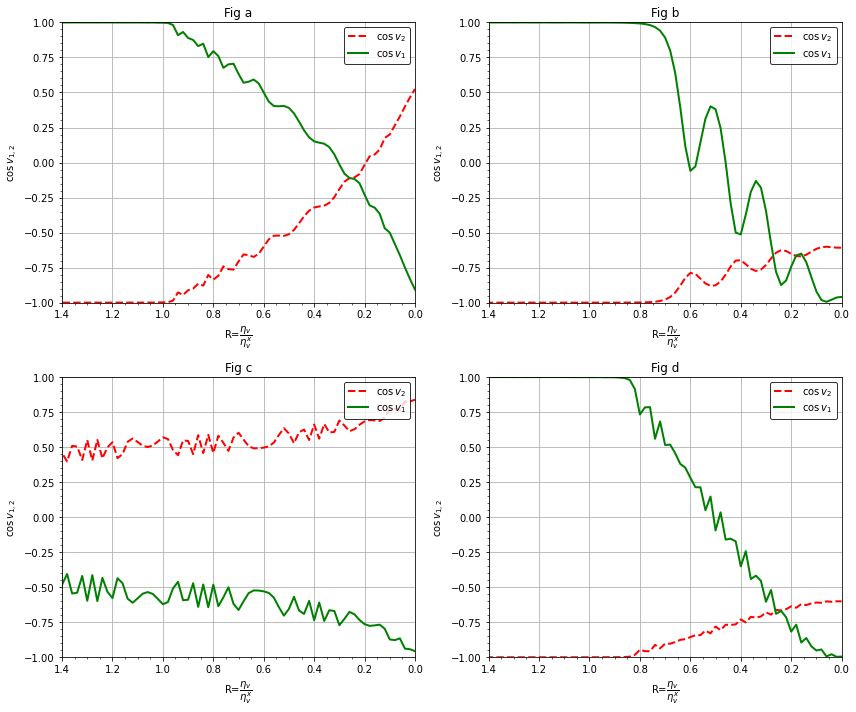

In [4085]:
#2D Plots
#plotting together

fig,axes=plt.subplots(2,2,figsize=(12,10))

ax=axes[0][0]
ax.plot(R_1,c_1a,"r--",lw=2, label="$\cosv_2$")
ax.plot(R_1,c_2a,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.4,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig a")
ax.grid()
ax.minorticks_on()
fig.tight_layout()


ax=axes[0][1]
ax.plot(R_1,c_1b,"r--",lw=2, label="$\cosv_2$")
ax.plot(R_1,c_2b,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.4,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig b")
ax.grid()
ax.minorticks_on()
fig.tight_layout()



ax=axes[1][0]
ax.plot(R_1,c_1c,"r--",lw=2, label="$\cosv_2$")
ax.plot(R_1,c_2c,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.4,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig c")
ax.grid()
ax.minorticks_on()
fig.tight_layout()


ax=axes[1][1]
ax.plot(R_2,c_1d,"r--",lw=2, label="$\cosv_2$")
ax.plot(R_2,c_2d,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.4,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig d")
ax.grid()
ax.minorticks_on()
fig.tight_layout()



Comments: Above plots are the numerical solution of NFIS's EoM

In [4086]:
#Analytical solution for NFIS's equation of motion:

We have the following equations: --->>                                Eqn.66 in PHYSICAL REVIEW D 75, 125005 (2007)




$4\sin\upsilon_{1}\sin\upsilon_{2}=-\frac{\eta_{\nu}}{\eta^0_{\nu}}(\sin\upsilon_1-\alpha\sin\upsilon_2)\sin(\upsilon_1+\upsilon_2)$                       ----->> (1)

$(1-\alpha)\cos2\theta_v=\cos\upsilon_1+\alpha\cos\upsilon_2$      --------- >> (2)

Rewriting the equation (1) as,
 
$4\sin\upsilon_{1}\sin\upsilon_{2}=-\frac{\frac{\eta_{\nu}}{\eta^x_\nu}}{\frac{\eta^0_{\nu}}{\eta^x_\nu}}(\sin\upsilon_1-\alpha\sin\upsilon_2)\sin(\upsilon_1+\upsilon_2)$  

Further,

$4\sin\upsilon_{1}\sin\upsilon_{2}=-\frac{\frac{\eta_{\nu}}{\eta^x_\nu}}{\frac{\eta^0_{\nu}}{\eta^x_\nu}}(\sin\upsilon_1-\alpha\sin\upsilon_2)(\sin\upsilon_1\cos\upsilon_2+\cos\upsilon_1\sin\upsilon_2)$   

$\frac{4\sin\upsilon_{1}\sin\upsilon_{2}}{-\frac{\frac{\eta_{\nu}}{\eta^x_\nu}}{\frac{\eta^0_{\nu}}{\eta^x_\nu}}(\sin\upsilon_1-\alpha\sin\upsilon_2)}=\cos\upsilon_1\sin\upsilon_2+\sin\upsilon_1\cos\upsilon_2$  --------->>(3)




Given Parameters:

$\alpha$ is asymmetry parameter whose values are 0.2 and 0.8 


$\tilde\theta_v=0.01$,
$\theta_v=0.6$


where, $\tilde\theta_v=\pi/2 - \theta_v$

${\frac{\eta^0_{\nu}}{\eta^x_\nu}}=\frac{(1-\alpha)^2}{8(1+\alpha)}=r$ and  $\frac{\eta_{\nu}}{\eta^x_\nu}=R$ 





we can write  (2) as,

$\boxed{f(\cos\upsilon_1,\cos\upsilon_2)=\cos\upsilon_1+\alpha\cos\upsilon_2-(1-\alpha)\cos2\theta_v=0}$   -------->>(4) 




Further we can simply (3) by replacing all the sine terms by cosines, we have;

$\frac{4\sqrt(1-\cos\upsilon^2_{1})\sqrt(1-\cos\upsilon^2_{2})}{-\frac{\frac{\eta_{\nu}}{\eta^x_\nu}}{\frac{\eta^0_{\nu}}{\eta^x_\nu}}(\sqrt(1-\cos\upsilon^2_1)-\alpha\sqrt(1-\cos\upsilon^2_2))}=\cos\upsilon_1\sqrt(1-\cos\upsilon^2_2)+\sqrt(1-\cos\upsilon^2_1)\cos\upsilon_2$    ----->>(5)

finally we can write (5) as;

$f(\cos\upsilon_1,\cos\upsilon_2)=\cos\upsilon_1\sqrt(1-\cos\upsilon^2_2)+\sqrt(1-\cos\upsilon^2_1)\cos\upsilon_2-\frac{4\sqrt(1-\cos\upsilon^2_{1})\sqrt(1-\cos\upsilon^2_{2})}{-\frac{\frac{\eta_{\nu}}{\eta^x_\nu}}{\frac{\eta^0_{\nu}}{\eta^x_\nu}}(\sqrt(1-\cos\upsilon^2_1)-\alpha\sqrt(1-\cos\upsilon^2_2))}=0$  ------(6)





Using definiton of r and R define above , (6) takes the form,


$\boxed{f(\cos\upsilon_1,\cos\upsilon_2)=\cos\upsilon_1\sqrt(1-\cos\upsilon^2_2)+\sqrt(1-\cos\upsilon^2_1)\cos\upsilon_2+\frac{4r\sqrt(1-\cos\upsilon^2_{1})\sqrt(1-\cos\upsilon^2_{2})}{{R}(\sqrt(1-\cos\upsilon^2_1)-\alpha\sqrt(1-\cos\upsilon^2_2))}=0}$ ----->>(7)


We will solve (4) and (7) for $\cos\upsilon_1$ and $\cos\upsilon_2$ for given r, R, theta and alpha.

Note: In this analysis, we will use R as a input parameter for which we will examine the $\cos\upsilon_1$ and $\cos\upsilon_2$  dependence.

In [4087]:
# Code for solving equations (4) and (7)

In [4088]:
%matplotlib inline

import numpy as np
import scipy as sp
import sympy as smp
import scipy.optimize 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [4089]:
R=np.linspace(2,0,101)                   #n_v/n_v^x

a=0.8                                    # a=alpha (Asymmetry parameter given)

theta=(np.pi/2)-0.01                      # vacuum mixing angle


In [4090]:
def function(z,R):                         #x,y=z -->variables
    x=z[0]                                 #x=cos(v1),              
    y=z[1]                                 #y=cos(v2)
    
    r=((1-a)**2)/(8*(1+a))                 # we can find out r for given alpha
    
    ratio=r/R                              # r= n^0_v/n^x_v  and R=n_v/n^x_v

    factor_1=np.sqrt(1-x**2)
    
    factor_2=np.sqrt(1-y**2)
    
    f1=x+(a*y)-((1-a)*np.cos(2*theta))     #eqn (4) defined above 
   
    f2=(x*factor_2)+(factor_1*y)+((4*ratio*factor_1*factor_2)/(factor_1-a*factor_2))  #eqn (7) defined above 
    
   
    return (f1,f2)

In [4091]:
# For scipy fsolve mudule we need initial guess values to solve the function
# In our case we have to provide initial values for cos(v1) and cos(v2) to the function:

We have equation (2) as,

$(1-\alpha)\cos2\theta_v=\cos\upsilon_1+\alpha\cos\upsilon_2$  

For given $\alpha=0.8$ and $\theta \approx \pi/2$ , equation (2) becomes $\approx 0 $ for the choice of $\cos\upsilon_1=0$ and $\cos\upsilon_2=0$  ---> guess values =$(\cos\upsilon_1,\cos\upsilon_2)$=(0,0)



In [4092]:
#R is the values in X axis in fig 3 for which we want figure out z 
#z=fsolve(function,(0,0),args=(R)) #z will give cos(v1)  and cos(v2)  #x,y=z --> x=cos(v1), y=cos(v2)
# We have to pass R as an array to find out  all the solutions for cos(v1) and cos(v2)

In [4093]:
#Panel 3(a) in paper


x=[]           #x=cos_v1
y=[]           #y=cos_v2

initial_values_1=np.cos(2*theta),-np.cos(2*theta)

z=fsolve(function,(initial_values_1),args=(R[0]),xtol=1.49012e-08)

for i in range(R.size):
    
    z_1=fsolve(function,(z),args=(R[i]),xtol=1.49012e-08)
    z=z_1
    
    #print(z)             #z contains solution for x and y
 
    
    x.append(z[0])       #listing solution for cos_v1 in x
             
    y.append(z[1])       #listing solution for cos_v2 in y

/var/folders/px/h6xhv_615bdcvbzrl_q0jfsr0000gn/T/ipykernel_10196/344996562.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  ratio=r/R                              # r= n^0_v/n^x_v  and R=n_v/n^x_v
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [4094]:
#plt.plot(R,y,"r--",lw=2, label="$\cosv_2$")
#plt.plot(R,x,"g-",lw=2, label="$\cosv_1$")
#plt.ylabel("$\cosv_{1,2}$")
#plt.xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
#plt.legend(loc="upper right",edgecolor='black')
#plt.xlim(1.0,0.2)

In [4095]:
#We will do the same analysis taking theta=0.6 and alpha=0.8
#We will pass the new value of theta to the function 

#Panel 3(c) in paper

def function_1(z,R):                       #x,y=z -->variables
    x=z[0]                                 #x=cos(v1),              
    y=z[1]                                 #y=cos(v2)

    r=((1-a)**2)/(8*(1+a))
    
    ratio=r/R                              # r= n^0_v/n^x_v  and R=n_v/n^x_v

    factor_1=np.sqrt(1-x**2)
    
    factor_2=np.sqrt(1-y**2)
    
    f1=x+(a*y)-((1-a)*np.cos(2*theta_1))     #eqn (4) defined above 
   
    f2=(x*factor_2)+(factor_1*y)+((4*ratio*factor_1*factor_2)/(factor_1-a*factor_2))  #eqn (7) defined above 
    
   
    return (f1,f2)


In [4096]:
x_1=[]           #x_1=cos_v1     
y_1=[]           #y_1=cos_v2

theta_1=0.6

initial_values_2=np.cos(2*theta_1),-np.cos(2*theta_1)

z_2=fsolve(function_1,(initial_values_2),args=(R[0]),xtol=1.49012e-08)

for i in range(R.size):
    
    z_3=fsolve(function_1,(z_2),args=(R[i]),xtol=1.49012e-08)
    z_2=z_3
    
    #print(z_2)             #z contains solution for x and y, here x taken as x_1 and y taken as y_1
 
    
    x_1.append(z_3[0])       #listing solution for cos_v1 in x_1
             
    y_1.append(z_3[1])       #listing solution for cos_v2 in y_1


/var/folders/px/h6xhv_615bdcvbzrl_q0jfsr0000gn/T/ipykernel_10196/1268907694.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  ratio=r/R                              # r= n^0_v/n^x_v  and R=n_v/n^x_v


In [4097]:
#plt.plot(R,y_1,"r--",lw=2, label="$\cosv_2$")
#plt.plot(R,x_1,"g-",lw=2, label="$\cosv_1$")
#plt.ylabel("$\cosv_{1,2}$")
#plt.xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
#plt.legend(loc="upper right",edgecolor='black')
#plt.xlim(2.0,0.0)
#plt.ylim(-1,1)

In [4098]:
#Panel 3(b) in paper


#We will do the same analysis taking asymmtry parameter alpha=0.2 and theta=(pi/2)-0.01

a=0.2  #Asymmetry parameter

#r=0.06666      #values of r calculated for given alpha=0.2

x_2=[]           #x_2=cos_v1
y_2=[]           #y_2=cos_v2

z_4=fsolve(function,(initial_values_1),args=(R[0]),xtol=1.49012e-08)

for i in range(R.size):
    
    z_5=fsolve(function,(z_4),args=(R[i]), xtol=1.49012e-08)
    z_4=z_5
    
    #print(z_4)             #z contains solution for x and y, here x taken as x_2 and y taken as y_2 
 
 
    
    x_2.append(z_5[0])       #listing solution for cos_v1 in x_2
             
    y_2.append(z_5[1])       #listing solution for cos_v2 in y_2
    
 

/var/folders/px/h6xhv_615bdcvbzrl_q0jfsr0000gn/T/ipykernel_10196/344996562.py:11: RuntimeWarning: invalid value encountered in sqrt
  factor_2=np.sqrt(1-y**2)
/var/folders/px/h6xhv_615bdcvbzrl_q0jfsr0000gn/T/ipykernel_10196/344996562.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  ratio=r/R                              # r= n^0_v/n^x_v  and R=n_v/n^x_v


In [4099]:
#plt.plot(R,y_2,"r--",lw=2, label="$\cosv_2$")
#plt.plot(R,x_2,"g-",lw=2, label="$\cosv_1$")
#plt.ylabel("$\cosv_{1,2}$")
#plt.xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
#plt.legend(loc="upper right",edgecolor='black')
#plt.legend(loc="upper right",fontsize=10,ncol=2)
#plt.xlim(2.0,0.0)

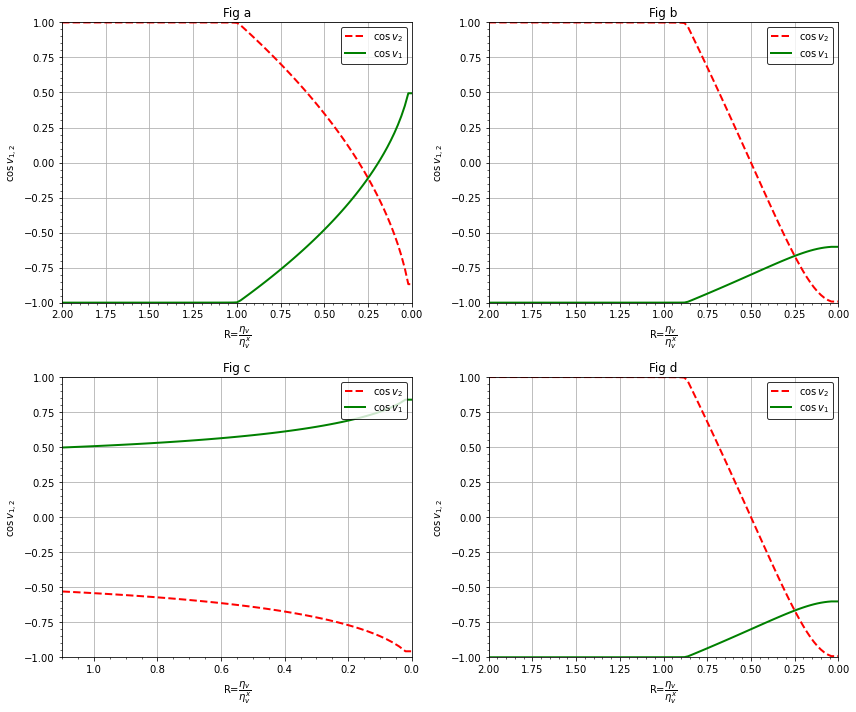

In [4100]:
#2D Plots

fig,axes=plt.subplots(2,2,figsize=(12,10))

ax=axes[0][0]
ax.plot(R,y,"r--",lw=2, label="$\cosv_2$")
ax.plot(R,x,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(2.0,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig a")
ax.grid()
ax.minorticks_on()
fig.tight_layout()


ax=axes[0][1]
ax.plot(R,y_2,"r--",lw=2, label="$\cosv_2$")
ax.plot(R,x_2,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(2.0,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig b")
ax.grid()
ax.minorticks_on()
fig.tight_layout()



ax=axes[1][0]
ax.plot(R,y_1,"r--",lw=2, label="$\cosv_2$")
ax.plot(R,x_1,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.1,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig c")
ax.grid()
ax.minorticks_on()
fig.tight_layout()


ax=axes[1][1]
ax.plot(R,y_2,"r--",lw=2, label="$\cosv_2$")
ax.plot(R,x_2,"g-",lw=2, label="$\cosv_1$")
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(2.0,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig d")
ax.grid()
ax.minorticks_on()
fig.tight_layout()



Comments: Above plots are the Analytical solution 

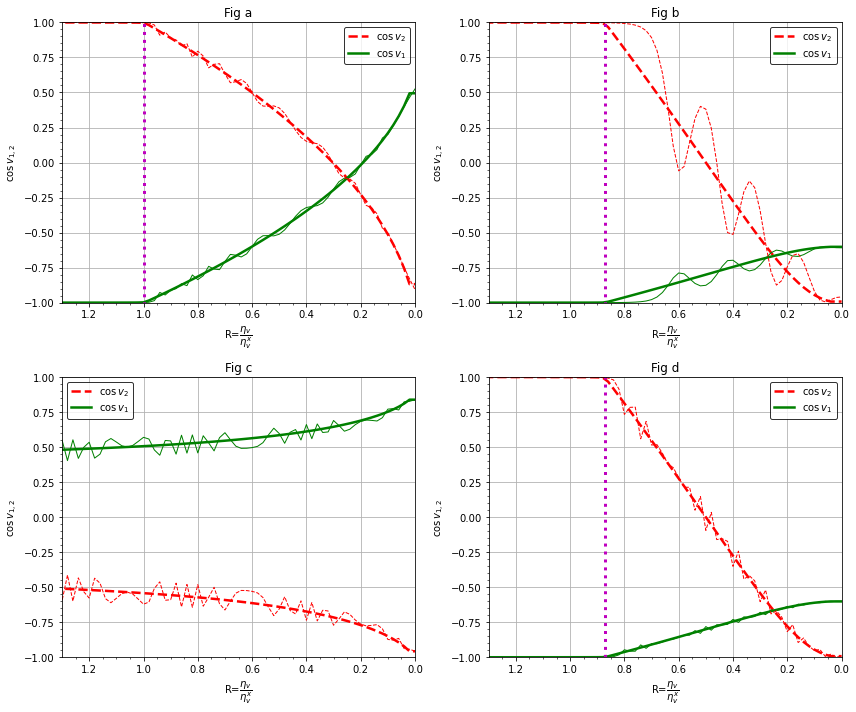

In [4101]:
#Plotting Numerical solution of NFIS'S and analytical solution of Flavor pendulum together:
#2D Plot visuliasation



fig,axes=plt.subplots(2,2,figsize=(12,10))

ax=axes[0][0]
ax.plot(R,y,"r--",lw=2.5, label="$\cosv_2$")
ax.plot(R,x,"g-",lw=2.5, label="$\cosv_1$")
ax.plot(R_1,c_1a,"g-",lw=1)
ax.plot(R_1,c_2a,"r--",lw=1)
ax.axvline(x = n_c_a, ymin=-1.0, ymax=1.0, color="m", linestyle=":",lw=3.0)
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.3,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig a")
ax.grid()
ax.minorticks_on()
fig.tight_layout()


ax=axes[0][1]
ax.plot(R,y_2,"r--",lw=2.5, label="$\cosv_2$")
ax.plot(R,x_2,"g-",lw=2.5, label="$\cosv_1$")
ax.plot(R_1,c_1b,"g-",lw=1)
ax.plot(R_1,c_2b,"r--",lw=1)
ax.axvline(x = n_c_b, ymin=-1.0, ymax=1.0, color="m", linestyle=":",lw=3.0)
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.3,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig b")
ax.grid()
ax.minorticks_on()
fig.tight_layout()



ax=axes[1][0]
ax.plot(R,y_1,"r--",lw=2.5, label="$\cosv_2$")
ax.plot(R,x_1,"g-",lw=2.5, label="$\cosv_1$")
ax.plot(R_1,c_1c,"g-",lw=1)
ax.plot(R_1,c_2c,"r--",lw=1)
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(edgecolor='black')
ax.set_xlim(1.3,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig c")
ax.grid()
ax.minorticks_on()
fig.tight_layout()


ax=axes[1][1]
ax.plot(R,y_2,"r--",lw=2.5, label="$\cosv_2$")
ax.plot(R,x_2,"g-",lw=2.5, label="$\cosv_1$")
ax.plot(R_2,c_1d,"g-",lw=1)
ax.plot(R_2,c_2d,"r--",lw=1)
ax.axvline(x = n_c_b, ymin=-1.0, ymax=1.0, color="m", linestyle=":",lw=3.0)
ax.set_ylabel("$\cosv_{1,2}$")
ax.set_xlabel("R=$\dfrac{\eta_v}{\eta_v^x}$")
ax.legend(loc="upper right",edgecolor='black')
ax.set_xlim(1.3,0.0)
ax.set_ylim(-1,1)
ax.set_title("Fig d")
ax.grid()
ax.minorticks_on()
fig.tight_layout()

#matplotlib.pyplot.vlines(x, ymin, ymax, color, linestyle, lw)


Comments: Fig (3) in PRD 75, 125005 (2007)

Thick lines represent analytical solution of $\cos\upsilon_1$ and $\cos\upsilon_2$, where $\upsilon_1$ and $\upsilon_2$ are the polar angles of the NFIS's $s_1$ and $s_{2}$ with respect to $H_V$, as functions of neutrino number density $n_\nu$ for simple asymmetric bipolar systems. 

Fig (a), (b), and (d) have mixing angle $\tilde\theta=0.01$ and figure (c) has $\theta$=0.6.The asymmetry parameter is $\alpha$=0.8 for fig (a) and (c), and $\alpha$=0.2 for (b) and (d).

The thin curly lines are computed numerically using NFIS's EOM. For fig (a), (b) and (c) $\gamma$ is 40 and for fig (d) $\gamma$ is 200. The vertical magenta line in fig (a), (b) and (d) correpond to critical neutrino number density $n_\nu=n_\nu^c$

In [4102]:
# Flavor Pendulum in Precession mode:

Frequency of the Pendulum in precession mode is given by;


$\Omega=\mu_V[1-\frac{\alpha}{2\sin\upsilon_1}(\frac{n_\nu}{n_\nu^0})\sin(\upsilon_1+\upsilon_2)]$ ---------->(1)


&


$\Omega=\mu_V[-1-\frac{1}{2\sin\upsilon_2}(\frac{n_\nu}{n_\nu^0})\sin(\upsilon_1+\upsilon_2)]$ ----------->(2)

(1) can be written as,

=> $\frac{\Omega}{\mu_V}=[1-\frac{\alpha}{2\sin\upsilon_1}(\frac{n_\nu}{n_\nu^0})\sin(\upsilon_1+\upsilon_2)]$

Further,
$\frac{\Omega}{\mu_V}=[1-\frac{\alpha}{2\sin\upsilon_1}(\frac{n_\nu}{n_\nu^0})(\sin\upsilon_1\cos\upsilon_2+\cos\upsilon_1\sin\upsilon_2)]$

replacing sine by cosines,

$\frac{\Omega}{\mu_V}=[1-\frac{\alpha}{2(1-\cos\upsilon_1^2)^{1/2}}(\frac{n_\nu}{n_\nu^0})((1-\cos\upsilon_1^2)^{1/2}\cos\upsilon_2+\cos\upsilon_1(1-\cos\upsilon_2^2)^{1/2})]$

$\frac{\Omega}{\mu_V}=[1-\frac{\alpha}{2(1-\cos\upsilon_1^2)^{1/2}}(\frac{n_\nu}{n_\nu^x}\frac{n_\nu^x}{n_\nu^0})((1-\cos\upsilon_1^2)^{1/2}\cos\upsilon_2+\cos\upsilon_1(1-\cos\upsilon_2^2)^{1/2})]$

And we have, $\boxed{ n_\nu^x=8\frac{1+\alpha}{(1-\alpha)^2}n_\nu^0}$  ------>>(C)

Thus above equation becomes, 

$\boxed{\frac{\Omega}{\mu_V}=[1-\frac{\alpha}{2(1-\cos\upsilon_1^2)^{1/2}}(\frac{n_\nu}{n_\nu^x})\frac{8(1+\alpha)}{(1-\alpha)^2}((1-\cos\upsilon_1^2)^{1/2}\cos\upsilon_2+\cos\upsilon_1(1-\cos\upsilon_2^2)^{1/2})]}$ ---------->(3)

Similarly (2) can be written as,

$\boxed{\frac{\Omega}{\mu_V}=[-1-\frac{1}{2(1-\cos\upsilon_2^2)^{1/2}}(\frac{n_\nu}{n_\nu^x})\frac{8(1+\alpha)}{(1-\alpha)^2}((1-\cos\upsilon_1^2)^{1/2}\cos\upsilon_2+\cos\upsilon_1(1-\cos\upsilon_2^2)^{1/2})]}$ --------->(4)



For given $\alpha$ and $\theta$ we already computed $\cos\upsilon_1$ and $\cos\upsilon_2$, so we can find out $\Omega$ easily. 

In [4103]:
# Code to calculate the Precession frequency of the Flavor Pendulum:

In [4104]:
R_3=np.linspace(2,0,101)  #n_v/n_v^x

In [4105]:
x=np.array(x)  #cos_v1   # x,y: Analytical solution for theta_tilde=0.01 and alpha=0.8 
    
y=np.array(y)  #cos_v2

def Omega_1(alpha_1):   #Here the argument is used just like an dummy index
    
    #m_1=np.sqrt(1-c_1a**2)  #c_1a=cos_v1  # c_1a,c_2a :Numerical solution for theta_tilde=0.01 and alpha=0.8 gamma=40
    
    #m_2=np.sqrt(1-c_2a**2)  #c_2a=cos_v2  
    
    m_1=np.sqrt(1-x**2)     
    
    m_2=np.sqrt(1-y**2)
    
    m_3=(R_3*8*(1+alpha_1))/((1-alpha_1)**2)
    
    m_4= alpha_1/(2*m_1)
    
    return 1-(m_4*m_3*((m_1*y)+(x*m_2)))  #equation(3) defined above

    #return -1-((1/(2*m_2))*m_3*((m_1*y)+(x*m_2)))     #equation(4) defined above


In [4106]:
alpha_1=0.8

Omega_1(alpha_1)  #for theta_tilde=0.01 and alpha=0.8 

freq_1=Omega_1(alpha_1) 

In [4107]:
x_2=np.array(x_2)  #cos_v1   # x_2,y_2: Analytical solution for theta_tilde=0.01 and alpha=0.2 
    
y_2=np.array(y_2)  #cos_v2

def Omega_2(alpha_2):  #Here the argument is used just like an dummy index
    
    #m_1=np.sqrt(1-c_1b**2)   #c_1b=cos_v1 #c_1b,c_2b :Numerical solution for theta_tilde=0.01 and alpha=0.8 gamma=40
    
    #m_2=np.sqrt(1-c_2b**2)   #c_2b=cos_v2
    
    m_1=np.sqrt(1-x_2**2)
    m_2=np.sqrt(1-y_2**2)
    
    m_3=(R_3*8*(1+alpha_2))/((1-alpha_2)**2)   
    
    m_4=alpha_2/(2*m_1)
    
    return 1-(m_4*m_3*((m_1*y_2)+(x_2*m_2)))  #equation(3) defined above

    #return -1-(1/(2*m_2))*m_3*((m_1*y)+(x*m_2))   #equation (4) defined above

In [4108]:
alpha_2=0.2

Omega_2(alpha_2)

freq_2=Omega_2(alpha_2)

In [4109]:
x_1=np.array(x_1) #cos_v1   # x_2,y_2: Analytical solution for theta=0.6 and alpha=0.8

y_1=np.array(y_1) #cos_v2


def Omega_3(alpha_1):  #Here the argument is used just like an dummy index
    
    #m_1=np.sqrt(1-c_1c**2)   #cos_v1   # c_1c,c_2c : Numerical solution for theta=0.6 and alpha=0.8 gamma=40
    
    #m_2=np.sqrt(1-c_2c**2)   #cos_v2
    
    m_1=np.sqrt(1-x_1**2)
    m_2=np.sqrt(1-y_1**2)
    
    m_3=(R_3*8*(1+alpha_1))/((1-alpha_1)**2)
    
    m_4=alpha_1/(2*m_1)
    
    return 1-(m_4*m_3*((m_1*y_1)+(x_1*m_2)))          #equation (3) defined above

    #return -1-(1/(2*m_2))*m_3*((m_1*y)+(x*m_2))      #equation (4) defined above

In [4110]:
Omega_3(alpha_1)

freq_3=Omega_3(alpha_1)


Precession frequency of the Flavor Pendulum is maximum at critical density;

$\Omega(n_{\nu}=n_\nu^c)=1+\frac{2\sqrt\alpha}{1-\sqrt\alpha}$


In [4111]:
def Omega_c(alpha): # Precession Frequency at critical number density
    
    return 1+(2*np.sqrt(alpha)/(1-np.sqrt(alpha)))

In [4112]:
Omega_c(0.8)  # Precession frequency for alpha=0.8


17.944271909999156

In [4113]:
Omega_c(0.2)  #Precession frequency for alpha=0.2

2.618033988749895

Text(0, 0.5, '$\\dfrac{\\Omega}{\\mu_{V}}$')

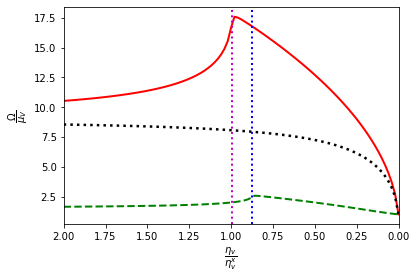

In [4115]:
plt.plot(R_3, freq_1,"r", lw=2)
plt.plot(R_3, freq_2,"g--", lw=2)
plt.plot(R_3, freq_3,"k:", lw=2.5)
plt.axvline(x=n_c_a,color="m", linestyle=":", lw=2.0)  #critical number density for alpha=0.8 
plt.axvline(x=n_c_b,color="b", linestyle=":", lw=2.0)  #critical number density for alpha=0.2
plt.xlim(2,0)
plt.xlabel("$\dfrac{\eta_v}{\eta_v^x}$")
plt.ylabel("$\dfrac{\Omega}{\mu_{V}}$")

#matplotlib.pyplot.vlines(x, ymin, ymax, color, linestyle, lw)


Comments: Fig (4) in PRD 75, 125005 (2007)

Scaled frequency of the Flavor pendulum in precession mode as function of neutrino number density $n_\nu$. The vacuum mixing angle $\tilde \theta=0.01$ for the solid red line and dashed green line and $\theta=0.6$ for dotted black line.

Asymmetry parameter is $\alpha=0.8$ for the solid red line and dotted black line . Whereas for the dashed green line $\alpha=0.2$. 

The vertical dotted magenta line correspond to $n_\nu=n_\nu^c$ for $\alpha=0.8$ and vertical dotted blue line for $\alpha=0.2$.